In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [165]:
train_2008 = pd.read_csv('./train_clean/train_clean_2008.csv')
test_2008 = pd.read_csv('./test_clean/test_clean_2008.csv')
train_2018 = pd.read_csv('./train_clean/train_clean_2018.csv')
test_2018 = pd.read_csv('./test_clean/test_clean_2018.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [155]:
train_2008.head()

PID ST_NUM    ST_NAME ST_NAME_SUF UNIT_NUM  ZIPCODE  PTYPE  LU  \
0  0100001000_    195  LEXINGTON          ST        0   2128.0    105  R3   
1  0100002000_    197  BROOKLINE          AV        0   2128.0    105  R3   
2  0100003000_    199  LEXINGTON          ST        0   2128.0    105  R3   
3  0100004000_    201  LEXINGTON          ST        0   2128.0    105  R3   
4  0100005000_    203  LEXINGTON          ST        0   2128.0    104  R2   

  OWN_OCC                  OWNER     ...      U_AC U_FPLACE AV_BLDG  \
0       Y         PASCUCCI CARLO     ...         N      0.0  265500   
1       N       ATANASOV, DANIEL     ...         N      0.0  340300   
2       N           GUERRA ANA S     ...         N      0.0  302300   
3       N  MADDALENI JAMES E, TS     ...         N      0.0  315000   
4       Y   DIGIROLAMO JOHN F TS     ...         N      0.0  241500   

   GROSS_TAX  AV_LAND  AV_TOTAL  U_KITCH_TYPE  STRUCTURE_CLASS  \
0     400624    99700    365200             0                R   
1     474014    91800    432100             0                R   
2     432437    91900    394200             0                R   
3     446479    92000    407000             0                R   
4     387022   111300    352800             0                R   

                             LatLong       GIS_ID  
0                            nan|nan  1102128015_  
1                            nan|nan  1702569000_  
2       42.2721229397|-71.0779526633  1800079000_  
3  42.268792190700005|-71.0926506592  1801014000_  
4       42.2701646032|-71.1030902067  1802070000_  

[5 rows x 55 columns]

In [156]:
train_2008.describe().T

count           mean           std     min            25%  \
ZIPCODE       119727.0    2128.640206  2.856716e+02     0.0    2119.000000   
PTYPE         119727.0     203.994195  2.622867e+02    10.0     102.000000   
LAND_SF       119727.0    9175.377960  3.237362e+05     0.0    1044.212711   
YR_BUILT      119727.0    1927.003592  5.501321e+02  1700.0    1900.000000   
YR_REMOD      119727.0    1996.235076  7.415465e+01  1890.0    1996.000000   
GROSS_AREA    119727.0    4185.289723  2.637777e+04     0.0     660.000000   
LIVING_AREA   119727.0    3243.478436  2.439609e+04     0.0     658.000000   
NUM_FLOORS    119727.0       1.723289  1.341578e+00     0.0       1.000000   
R_TOTAL_RMS   119727.0      10.068624  2.393041e+00     1.0      10.068780   
R_BDRMS       119727.0       1.859781  2.561242e+00     0.0       0.000000   
R_FULL_BTH    119727.0       0.796320  1.112070e+00     0.0       0.000000   
R_HALF_BTH    119727.0       0.135550  3.810615e-01     0.0       0.000000   
R_KITCH       119727.0       1.766052  5.146272e-01     0.0       1.769613   
R_FPLACE      119727.0       0.137329  4.815910e-01     0.0       0.000000   
S_NUM_BLDG    119727.0       0.045487  2.240169e-01     0.0       0.000000   
S_UNIT_RES    119727.0       0.381418  5.695457e+00     0.0       0.000000   
S_UNIT_COM    119727.0       0.010516  7.324431e-01     0.0       0.000000   
S_UNIT_RC     119727.0       0.003592  8.204210e-01     0.0       0.000000   
U_BASE_FLOOR  119727.0       1.386752  2.988593e+00     0.0       0.000000   
U_NUM_PARK    119727.0       0.229602  7.106290e-01     0.0       0.000000   
U_TOT_RMS     119727.0       2.576573  6.421031e+00     0.0       0.000000   
U_BDRMS       119727.0       1.356958  4.897230e+00     0.0       0.000000   
U_FULL_BTH    119727.0       0.573531  7.011495e-01     0.0       0.000000   
U_HALF_BTH    119727.0       0.056117  2.238591e-01     0.0       0.000000   
U_FPLACE      119727.0       0.072248  3.061145e-01     0.0       0.000000   
AV_BLDG       119727.0  542563.725242  5.194171e+06     0.0  165700.000000   
GROSS_TAX     119727.0  861258.410409  1.357254e+07     0.0  239146.000000   
AV_LAND       119727.0  185816.336031  2.198162e+06     0.0       0.000000   
AV_TOTAL      119727.0  728380.061273  6.645642e+06     0.0  229300.000000   

                        50%            75%           max  
ZIPCODE         2127.000000    2131.000000  9.822100e+04  
PTYPE            102.000000     105.000000  9.950000e+02  
LAND_SF         2433.000000    5000.000000  1.015968e+08  
YR_BUILT        1920.000000    1935.000000  1.919000e+05  
YR_REMOD        2000.000000    2000.000000  2.000300e+04  
GROSS_AREA      1836.000000    3892.000000  2.082040e+06  
LIVING_AREA     1306.000000    2448.000000  2.034730e+06  
NUM_FLOORS         2.000000       2.000000  5.000000e+01  
R_TOTAL_RMS       10.068780      10.068780  8.000000e+01  
R_BDRMS            0.000000       4.000000  1.600000e+01  
R_FULL_BTH         0.000000       2.000000  9.000000e+00  
R_HALF_BTH         0.000000       0.000000  6.000000e+00  
R_KITCH            1.769613       1.769613  5.000000e+00  
R_FPLACE           0.000000       0.000000  9.000000e+00  
S_NUM_BLDG         0.000000       0.000000  2.100000e+01  
S_UNIT_RES         0.000000       0.000000  7.190000e+02  
S_UNIT_COM         0.000000       0.000000  1.970000e+02  
S_UNIT_RC          0.000000       0.000000  2.810000e+02  
U_BASE_FLOOR       0.000000       2.000000  4.100000e+01  
U_NUM_PARK         0.000000       0.000000  1.000000e+01  
U_TOT_RMS          0.000000       4.000000  9.900000e+01  
U_BDRMS            0.000000       2.000000  8.000000e+01  
U_FULL_BTH         0.000000       1.000000  6.000000e+00  
U_HALF_BTH         0.000000       0.000000  4.000000e+00  
U_FPLACE           0.000000       0.000000  6.000000e+00  
AV_BLDG       267200.000000  377700.000000  5.416603e+08  
GROSS_TAX     385596.000000  529961.000000  1.962521e+09  
AV_LAND        83100.000

In [157]:
train_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119727 entries, 0 to 119726
Data columns (total 55 columns):
PID                119727 non-null object
ST_NUM             119727 non-null object
ST_NAME            119727 non-null object
ST_NAME_SUF        119727 non-null object
UNIT_NUM           119727 non-null object
ZIPCODE            119727 non-null float64
PTYPE              119727 non-null int64
LU                 119727 non-null object
OWN_OCC            119727 non-null object
OWNER              119727 non-null object
MAIL_ADDRESS       119727 non-null object
MAIL CS            119727 non-null object
MAIL_ZIPCODE       119727 non-null object
LAND_SF            119727 non-null float64
YR_BUILT           119727 non-null float64
YR_REMOD           119727 non-null float64
GROSS_AREA         119727 non-null float64
LIVING_AREA        119727 non-null float64
NUM_FLOORS         119727 non-null float64
R_BLDG_STYL        119727 non-null object
R_ROOF_TYP         119727 non-null object
R

In [158]:
train_2008.AV_TOTAL.describe()

count    1.197270e+05
mean     7.283801e+05
std      6.645642e+06
min      0.000000e+00
25%      2.293000e+05
50%      3.561000e+05
75%      4.867000e+05
max      7.571455e+08
Name: AV_TOTAL, dtype: float64

In [159]:
train_2008.columns

Index(['PID', 'ST_NUM', 'ST_NAME', 'ST_NAME_SUF', 'UNIT_NUM', 'ZIPCODE',
       'PTYPE', 'LU', 'OWN_OCC', 'OWNER', 'MAIL_ADDRESS', 'MAIL CS',
       'MAIL_ZIPCODE', 'LAND_SF', 'YR_BUILT', 'YR_REMOD', 'GROSS_AREA',
       'LIVING_AREA', 'NUM_FLOORS', 'R_BLDG_STYL', 'R_ROOF_TYP', 'R_EXT_FIN',
       'R_TOTAL_RMS', 'R_BDRMS', 'R_FULL_BTH', 'R_HALF_BTH', 'R_KITCH',
       'R_HEAT_TYP', 'R_AC', 'R_FPLACE', 'S_NUM_BLDG', 'S_BLDG_STYL',
       'S_UNIT_RES', 'S_UNIT_COM', 'S_UNIT_RC', 'S_EXT_FIN', 'U_BASE_FLOOR',
       'U_NUM_PARK', 'U_CORNER', 'U_ORIENT', 'U_TOT_RMS', 'U_BDRMS',
       'U_FULL_BTH', 'U_HALF_BTH', 'U_HEAT_TYP', 'U_AC', 'U_FPLACE', 'AV_BLDG',
       'GROSS_TAX', 'AV_LAND', 'AV_TOTAL', 'U_KITCH_TYPE', 'STRUCTURE_CLASS',
       'LatLong', 'GIS_ID'],
      dtype='object')

In [160]:
df_2008 = train_2008[train_2008['AV_TOTAL'] != 0]

In [161]:
train_2008[train_2008['AV_TOTAL'] != 0].describe()

ZIPCODE          PTYPE       LAND_SF       YR_BUILT  \
count  114409.000000  114409.000000  1.144090e+05  114409.000000   
mean     2128.838063     167.227150  8.993632e+03    1923.960204   
std       292.006305     203.856731  3.259951e+05      33.256900   
min         0.000000      10.000000  0.000000e+00    1700.000000   
25%      2120.000000     102.000000  1.044213e+03    1900.000000   
50%      2127.000000     102.000000  2.365000e+03    1920.000000   
75%      2131.000000     105.000000  5.000000e+03    1934.000000   
max     98221.000000     986.000000  1.015968e+08    2007.000000   

            YR_REMOD    GROSS_AREA   LIVING_AREA     NUM_FLOORS  \
count  114409.000000  1.144090e+05  1.144090e+05  114409.000000   
mean     1996.047400  4.379465e+03  3.393919e+03       1.641127   
std        75.849868  2.696810e+04  2.494641e+04       1.251478   
min      1890.000000  0.000000e+00  0.000000e+00       0.000000   
25%      1995.000000  7.410000e+02  7.370000e+02       1.000000   
50%      2000.000000  2.044000e+03  1.374000e+03       1.500000   
75%      2000.000000  4.000000e+03  2.520000e+03       2.000000   
max     20003.000000  2.082040e+06  2.034730e+06      50.000000   

         R_TOTAL_RMS        R_BDRMS      ...          U_NUM_PARK  \
count  114409.000000  114409.000000      ...       114409.000000   
mean       10.068616       1.946228      ...            0.240274   
std         2.448027       2.587787      ...            0.725192   
min         1.000000       0.000000      ...            0.000000   
25%        10.000000       0.000000      ...            0.000000   
50%        10.068780       0.000000      ...            0.000000   
75%        10.068780       4.000000      ...            0.000000   
max        80.000000      16.000000      ...           10.000000   

           U_TOT_RMS        U_BDRMS     U_FULL_BTH     U_HALF_BTH  \
count  114409.000000  114409.000000  114409.000000  114409.000000   
mean        2.510444       1.327085       0.553717       0.058726   
std         6.561061       5.007747       0.711065       0.228668   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         3.846154       1.447115       1.000000       0.000000   
max        99.000000      80.000000       6.000000       4.000000   

            U_FPLACE       AV_BLDG     GROSS_TAX       AV_LAND      AV_TOTAL  
count  114409.000000  1.144090e+05  1.144090e+05  1.144090e+05  1.144090e+05  
mean        0.075606  5.677834e+05  9.012917e+05  1.944535e+05  7.622369e+05  
std         0.312743  5.312172e+06  1.388310e+07  2.248297e+06  6.796443e+06  
min         0.000000  0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+02  
25%         0.000000  1.801000e+05  2.633900e+05  0.000000e+00  2.489000e+05  
50%         0.000000  2.754000e+05  3.981010e+05  9.650000e+04  3.671000e+05  
75%         0.000000  3.855000e+05  5.387370e+05  1.462000e+05  4.948000e+05  
max         6.000000  5.416603e+08  1.962521e+09  3.647944e+08  7.571455e+08  

[8 rows x 29 columns]

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


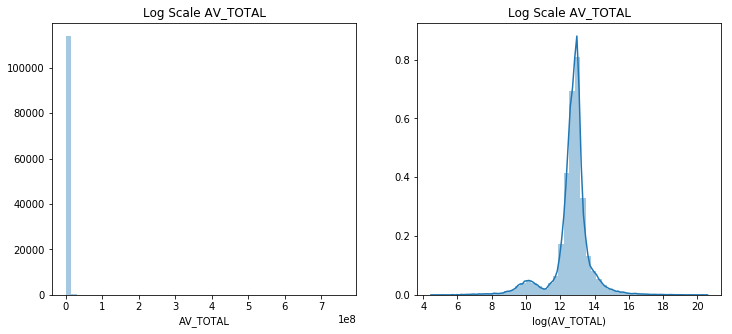

In [10]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('Log Scale AV_TOTAL')
sns.distplot(df_2008['AV_TOTAL'],kde=False)
plt.subplot(122)
sns.distplot(np.log(df_2008['AV_TOTAL']))
plt.xlabel('log(AV_TOTAL)')
plt.title('Log Scale AV_TOTAL');

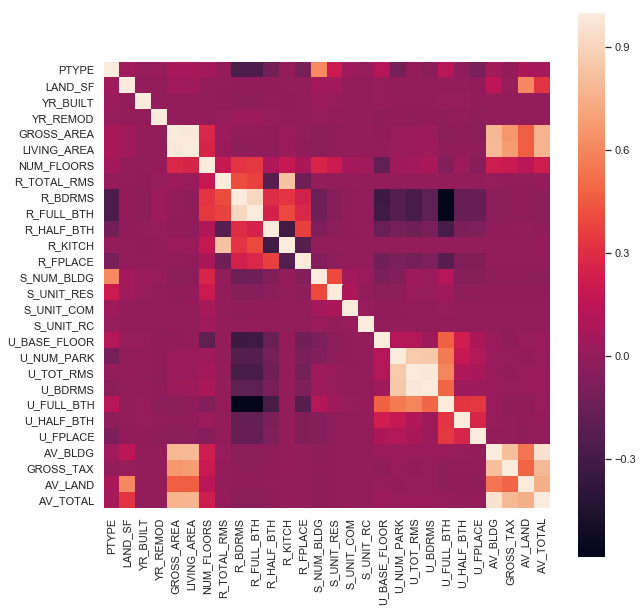

In [11]:
plt.figure(figsize=(10,10))
corr = train_2008.select_dtypes(include = ['float64', 'int64']).iloc[:,1:].corr()
sns.set(font_scale=1)  
sns.heatmap(corr, vmax=1, square=True);

In [12]:
corr_list = corr['AV_TOTAL'].sort_values(axis=0,ascending=False).iloc[1:]
corr_list

AV_BLDG         0.960526
GROSS_TAX       0.793814
LIVING_AREA     0.772626
GROSS_AREA      0.764628
AV_LAND         0.753586
LAND_SF         0.318254
NUM_FLOORS      0.213132
PTYPE           0.066178
U_BASE_FLOOR    0.023779
U_TOT_RMS       0.018269
U_BDRMS         0.017430
U_NUM_PARK      0.014204
U_FULL_BTH      0.008561
U_HALF_BTH      0.007754
R_TOTAL_RMS     0.006933
R_KITCH         0.005316
YR_BUILT        0.001038
YR_REMOD        0.000236
U_FPLACE       -0.000216
S_UNIT_RC      -0.000480
S_UNIT_COM     -0.001574
R_FPLACE       -0.002441
S_UNIT_RES     -0.007340
R_HALF_BTH     -0.011602
S_NUM_BLDG     -0.022255
R_FULL_BTH     -0.024613
R_BDRMS        -0.027931
Name: AV_TOTAL, dtype: float64

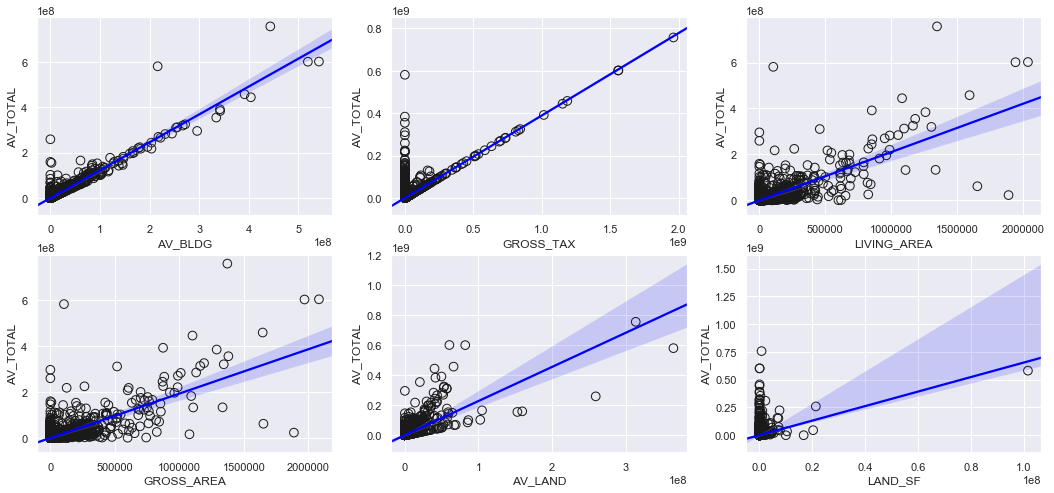

In [14]:
plt.figure(figsize=(18,8))
for i in range(6):
    ii = '23'+str(i+1)
    plt.subplot(ii)
    feature = corr_list.index.values[i]
    plt.scatter(train_2008[feature], train_2008['AV_TOTAL'], facecolors='none',edgecolors='k',s = 75)
    sns.regplot(x = feature, y = 'AV_TOTAL', data = train_2008,scatter=False, color = 'Blue')
    ax=plt.gca() 
#    ax.set_ylim([0,800000])

In [166]:
categorical_features = train_2018.select_dtypes(include = ['object']).columns

In [167]:
train_2018_categorical = train_2018[categorical_features]

In [168]:
train_2018_categorical.head()

PID       GIS_ID     ST_NUM    ST_NAME ST_NAME_SUF UNIT_NUM  LU  \
0  0100001000_  0100001000_  104 A 104     PUTNAM          ST        0  R3   
1  0100002000_  0100002000_      197    LEXINGTON          ST        0  R3   
2  0100003000_  0100003000_      199    LEXINGTON          ST        0  R3   
3  0100004000_  0100004000_      201    LEXINGTON          ST        0  R3   
4  0100005000_  0100005000_      203    LEXINGTON          ST        0  R2   

  OWN_OCC                  OWNER      MAIL_ADDRESS  \
0       Y         PASCUCCI CARLO  195 LEXINGTON ST   
1       N        ATANASOV DANIEL  197 LEXINGTON ST   
2       N        CHEVARRIA ANA S  199 LEXINGTON ST   
3       N  MADDALENI JAMES E, TS      PO BOX 557 #   
4       Y      DIGIROLAMO JOHN A  203 LEXINGTON ST   

                 ...                 R_HEAT_TYP R_AC S_BLDG_STYL S_EXT_FIN  \
0                ...                          W    N           0         0   
1                ...                          F    C           0         0   
2                ...                          S    N           0         0   
3                ...                          W    N           0         0   
4                ...                          W    N           0         0   

  U_CORNER U_ORIENT U_KITCH_TYPE U_HEAT_TYP U_AC  \
0        0        0            0          0    N   
1        0        0            0          0    N   
2        0        0            0          0    N   
3        0        0            0          0    N   
4        0        0            0          0    N   

                             LatLong  
0                            nan|nan  
1                            nan|nan  
2       42.2721229397|-71.0779526633  
3  42.268792190700005|-71.0926506592  
4       42.2701646032|-71.1030902067  

[5 rows x 26 columns]

In [169]:
train_2018_categorical.columns

Index(['PID', 'GIS_ID', 'ST_NUM', 'ST_NAME', 'ST_NAME_SUF', 'UNIT_NUM', 'LU',
       'OWN_OCC', 'OWNER', 'MAIL_ADDRESS', 'MAIL CS', 'MAIL_ZIPCODE',
       'STRUCTURE_CLASS', 'R_BLDG_STYL', 'R_ROOF_TYP', 'R_EXT_FIN',
       'R_HEAT_TYP', 'R_AC', 'S_BLDG_STYL', 'S_EXT_FIN', 'U_CORNER',
       'U_ORIENT', 'U_KITCH_TYPE', 'U_HEAT_TYP', 'U_AC', 'LatLong'],
      dtype='object')

In [170]:
categoricals_to_drop = ['PID','OWNER','ST_NUM','ST_NAME','ST_NAME_SUF','UNIT_NUM','MAIL_ADDRESS','MAIL CS','MAIL_ZIPCODE', 'LatLong', 'GIS_ID']

### Should we keep 'PID' because we can merge the two dataframes back together eventually? And 'OWNER' might be useful in terms of looking at how properties might increase in value over time steps.

In [171]:
train_2018_categorical.drop(categoricals_to_drop, axis = 1, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [172]:
train_2018_categorical.head()

LU OWN_OCC STRUCTURE_CLASS R_BLDG_STYL R_ROOF_TYP R_EXT_FIN R_HEAT_TYP  \
0  R3       Y               R          RE          F         A          W   
1  R3       N               R          RM          F         M          F   
2  R3       N               R          RM          F         M          S   
3  R3       N               R          RM          M         M          W   
4  R2       Y               R          RE          M         M          W   

  R_AC S_BLDG_STYL S_EXT_FIN U_CORNER U_ORIENT U_KITCH_TYPE U_HEAT_TYP U_AC  
0    N           0         0        0        0            0          0    N  
1    C           0         0        0        0            0          0    N  
2    N           0         0        0        0            0          0    N  
3    N           0         0        0        0            0          0    N  
4    N           0         0        0        0            0          0    N

In [174]:
train_2018_dummied = pd.get_dummies(train_2018_categorical)

In [175]:
train_2018_dummied.head()

LU_A  LU_AH  LU_C  LU_CC  LU_CD  LU_CL  LU_CM  LU_CP  LU_E  LU_EA   ...    \
0     0      0     0      0      0      0      0      0     0      0   ...     
1     0      0     0      0      0      0      0      0     0      0   ...     
2     0      0     0      0      0      0      0      0     0      0   ...     
3     0      0     0      0      0      0      0      0     0      0   ...     
4     0      0     0      0      0      0      0      0     0      0   ...     

   U_HEAT_TYP_O  U_HEAT_TYP_P  U_HEAT_TYP_S  U_HEAT_TYP_W  U_HEAT_TYP_Y  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   U_HEAT_TYP_f  U_HEAT_TYP_w  U_AC_C  U_AC_D  U_AC_N  
0             0             0       0       0       1  
1             0             0       0       0       1  
2             0             0       0       0       1  
3             0             0       0       0       1  
4             0             0       0       0       1  

[5 rows x 147 columns]

In [176]:
numeric_features = train_2018.select_dtypes(include = ['float64', 'int64']).columns

In [177]:
train_2018_numeric = train_2018[numeric_features]

In [178]:
train_2018_numeric.columns

Index(['ZIPCODE', 'PTYPE', 'AV_LAND', 'AV_BLDG', 'AV_TOTAL', 'GROSS_TAX',
       'LAND_SF', 'YR_BUILT', 'YR_REMOD', 'GROSS_AREA', 'LIVING_AREA',
       'NUM_FLOORS', 'R_TOTAL_RMS', 'R_BDRMS', 'R_FULL_BTH', 'R_HALF_BTH',
       'R_KITCH', 'R_FPLACE', 'S_NUM_BLDG', 'S_UNIT_RES', 'S_UNIT_COM',
       'S_UNIT_RC', 'U_BASE_FLOOR', 'U_NUM_PARK', 'U_TOT_RMS', 'U_BDRMS',
       'U_FULL_BTH', 'U_HALF_BTH', 'U_FPLACE'],
      dtype='object')

In [179]:
test_list = test_2018.columns
train_list = train_2018.columns

In [180]:
for i in train_list:
    if i not in test_list:
        print(i)

AV_LAND
AV_BLDG
AV_TOTAL
GROSS_TAX


In [181]:
numeric_drop_list = ['ZIPCODE','GROSS_TAX','AV_TOTAL','AV_LAND', 'AV_BLDG']
#don't want to drop AV total yet before polynomial features to check correlations
#numeric_drop_list = ['ZIPCODE','AV_TOTAL']

In [182]:
train_2018_numeric.drop(numeric_drop_list, axis = 1, inplace = True)

In [183]:
train_2018_numeric.head()

PTYPE  LAND_SF  YR_BUILT  YR_REMOD  GROSS_AREA  LIVING_AREA  NUM_FLOORS  \
0    105   1150.0    1900.0    2006.0      3353.0       2202.0         3.0   
1    105   1150.0    1920.0    2000.0      3299.0       2307.0         3.0   
2    105   1150.0    1905.0    1985.0      3392.0       2268.0         3.0   
3    105   1150.0    1900.0    1991.0      3108.0       2028.0         3.0   
4    104   2010.0    1900.0    1978.0      3700.0       2546.0         3.0   

   R_TOTAL_RMS  R_BDRMS  R_FULL_BTH    ...     S_UNIT_RES  S_UNIT_COM  \
0         12.0      6.0         3.0    ...            0.0         0.0   
1          9.0      3.0         3.0    ...            0.0         0.0   
2         13.0      5.0         3.0    ...            0.0         0.0   
3         11.0      5.0         3.0    ...            0.0         0.0   
4         13.0      6.0         3.0    ...            0.0         0.0   

   S_UNIT_RC  U_BASE_FLOOR  U_NUM_PARK  U_TOT_RMS  U_BDRMS  U_FULL_BTH  \
0        0.0           0.0         0.0        0.0      0.0         0.0   
1        0.0           0.0         0.0        0.0      0.0         0.0   
2        0.0           0.0         0.0        0.0      0.0         0.0   
3        0.0           0.0         0.0        0.0      0.0         0.0   
4        0.0           0.0         0.0        0.0      0.0         0.0   

   U_HALF_BTH  U_FPLACE  
0         0.0       0.0  
1         0.0       0.0  
2         0.0       0.0  
3         0.0       0.0  
4         0.0       0.0  

[5 rows x 24 columns]

In [184]:
train_2018_numeric.shape

(130134, 24)

# Polynomial Features for numeric features

## Not really worth it.

In [77]:
#from sklearn.preprocessing import PolynomialFeatures

#poly = PolynomialFeatures()
#features_train = train_2008_numeric.columns
#df_poly = poly.fit_transform(train_2008_numeric)
#df_poly.shape

In [78]:
#df = pd.DataFrame(df_poly, columns=poly.get_feature_names(features_train)) #to set up as a data frame
#df_test = pd.DataFrame(df_test_poly, columns=poly.get_feature_names(features_test))
#df.drop('1',axis=1, inplace = True)
#df_test.drop('1',axis=1, inplace = True)

In [35]:
#poly_columns = df.columns

In [37]:
#columns_containing_target = []
#for i in poly_columns:
#    if "AV_TOTAL" in i:
#        columns_containing_target.append(i)

In [39]:
#df.drop(columns_containing_target, axis = 1, inplace = True)

In [79]:
#df.head()

In [80]:
#corr__ = df.corr().loc['AV_TOTAL'].sort_values(ascending = False )

## Merge the two dfs

In [185]:
X_ = pd.concat([train_2018_numeric, train_2018_dummied], axis = 1)

In [186]:
X_.shape

(130134, 171)

In [187]:
X = X_
y_total = train_2018['AV_TOTAL']
y_tax = train_2018['GROSS_TAX']
y_land = train_2018['AV_LAND']
y_bldg = train_2018['AV_BLDG']

In [188]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y_total,
                                                    train_size = 0.8,
                                                    random_state = 42)

#Scale Data
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [191]:
def runGSAndGetRMSE(est, params):
#    gs = GridSearchCV(est, param_grid = params, verbose=0, scoring='neg_mean_squared_error')
    gs = GridSearchCV(est, param_grid = params, verbose=0, scoring='r2')
    gs.fit(X_train_ss, y_train)
#    print(np.sqrt(gs.best_score_*-1))
    print(np.sqrt(gs.best_score_))
    print(gs.best_params_)
    return gs.best_estimator_, gs.best_score_ 

In [86]:
#Lasso
#lassoParams = {'alpha':[0.0001, 0.001, .01, 0.1, 1, 10, 100, 1000]}
#bestLassoEst = runGSAndGetRMSE(Lasso(), lassoParams)

In [87]:
#lasso_coef = bestLassoEst.coef_
#coef_df = pd.DataFrame({'feature': X_train.columns, 'weight': lasso_coef})
#coef_df = coef_df.sort_values(by='weight', ascending=False)
#coef_df.head()

In [88]:
#fig, ax = plt.subplots(1,1, figsize=(12, 10))
#coef_df.iloc[:20, :].plot(kind='barh', x='feature', y='weight', ax=ax, fontsize = 10)
#_= ax.set_title("Lasso coefficients", fontsize=16)
#plt.tight_layout()

In [192]:
#Ridge
ridgeParams = {'alpha':np.linspace(7000, 7500, num=1)}
bestRidgeEst = runGSAndGetRMSE(Ridge(), ridgeParams);

0.8155952625590128
{'alpha': 7000.0}


In [196]:
gs = GridSearchCV(Ridge(), param_grid = {'alpha':np.linspace(7000, 7500, num=1)}, verbose=0, scoring='r2')
gs.fit(X_train_ss, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([7000.])}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='r2', verbose=0)

In [ ]:
gs.

In [193]:
ridge_coef = bestRidgeEst.coef_
coef_df_ = pd.DataFrame({'feature': X_train.columns, 'weight': ridge_coef})
coef_df_ = coef_df_.sort_values(by='weight', ascending=False)
coef_df_.head()

AttributeError: 'tuple' object has no attribute 'coef_'

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 10))
coef_df_.iloc[:20, :].plot(kind='barh', x='feature', y='weight', ax=ax, fontsize = 10)
_= ax.set_title("Ridge coefficients", fontsize=16)
plt.tight_layout()

In [69]:
import datetime
import numpy as np
import pandas as pd
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, LassoCV,LassoLarsCV, ElasticNet
from sklearn.cross_validation import KFold
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [70]:
def mean_squared_error_(ground_truth, predictions):
    return mean_squared_error(ground_truth, predictions) ** 0.5
RMSE = make_scorer(mean_squared_error_, greater_is_better=False)

In [86]:
def model_random_forecast(Xtrain,Xtest,ytrain):
    
    X_train = Xtrain
    y_train = ytrain
    rfr = RandomForestRegressor(n_jobs=1, random_state=0)
    param_grid = {'n_estimators': [5],  
                  'max_depth':[10]}
    model = GridSearchCV(estimator=rfr, param_grid=param_grid, n_jobs=1, cv=3, scoring='r2')
    model.fit(X_train, y_train)
    print('Random forecast regression...')
    print('Best Params:')
    print(model.best_params_)
    print('Best CV Score:')
    print(model.best_score_)

    y_pred = model.predict(Xtest)
    return y_pred, -model.best_score_

def model_gradient_boosting_tree(Xtrain,Xtest,ytrain):
    
    X_train = Xtrain
    y_train = ytrain 
    gbr = GradientBoostingRegressor(random_state=0)
    param_grid = {
 #       'n_estimators': [148],
 #       'max_features': [10,15],
#	'max_depth': [6,8,10],
 #       'learning_rate': [0.05,0.1,0.15],
  #      'subsample': [0.8]
    }
    model = GridSearchCV(estimator=gbr, param_grid=param_grid, n_jobs=1, cv=3, scoring='r2')
    model.fit(X_train, y_train)
    print('Gradient boosted tree regression...')
    print('Best Params:')
    print(model.best_params_)
    print('Best CV Score:')
    print(-model.best_score_)

    y_pred = model.predict(Xtest)
    return y_pred, -model.best_score_

def model_xgb_regression(Xtrain,Xtest,ytrain):
    
    X_train = Xtrain
    y_train = ytrain 
    
    xgbreg = xgb.XGBRegressor(seed=0)
    param_grid = {
#        'n_estimators': [148],
#        'learning_rate': [ 0.05],
#        'max_depth': [ 7, 9, 11]
#        'subsample': [ 0.8],
#        'colsample_bytree': [0.75,0.8,0.85],
    }
    model = GridSearchCV(estimator=xgbreg, param_grid=param_grid, n_jobs=1, cv=3, scoring='r2')
    model.fit(X_train, y_train)
    print('eXtreme Gradient Boosting regression...')
    print('Best Params:')
    print(model.best_params_)
    print('Best CV Score:')
    print(-model.best_score_)

    y_pred = model.predict(Xtest)
    return y_pred, -model.best_score_

def model_extra_trees_regression(Xtrain,Xtest,ytrain):
    
    X_train = Xtrain
    y_train = ytrain
    
    etr = ExtraTreesRegressor(n_jobs=1, random_state=0)
    param_grid = {}#'n_estimators': [500], 'max_features': [10,15,20]}
    model = GridSearchCV(estimator=etr, param_grid=param_grid, n_jobs=1, cv=3, scoring='r2')
    model.fit(X_train, y_train)
    print('Extra trees regression...')
    print('Best Params:')
    print(model.best_params_)
    print('Best CV Score:')
    print(-model.best_score_)

    y_pred = model.predict(Xtest)
    return y_pred, -model.best_score_

In [84]:
model_random_forecast(X_train_ss, X_test_ss, y_train)

Random forecast regression...
Best Params:
{'max_depth': 10, 'n_estimators': 5}
Best CV Score:
0.5751102827654303


(array([294407.58858632, 482248.04494931, 482248.04494931, ...,
        244203.66534226, 294407.58858632, 334398.6734854 ]),
 -0.5751102827654303)

In [87]:
#test_predict,score = model_random_forecast(X_train,X_test,y_train)
test_predict,score = model_xgb_regression(X_train,X_test,y_train)
#test_predict,score = model_extra_trees_regression(X_train,X_test,y_train)
#test_predict,score = model_gradient_boosting_tree(X_train,X_test,y_train)

eXtreme Gradient Boosting regression...
Best Params:
{}
Best CV Score:
-0.5540971088728454


In [121]:
train_list = train_2008.columns

In [122]:
test_list = test_2008.columns

In [124]:
for i in train_list:
    if i not in test_list:
        print(i)

AV_BLDG
GROSS_TAX
AV_LAND
AV_TOTAL


Your best R^2 score is: 0.8149207283556403
Your best alpha value is: {'alpha': 6000.0}


/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


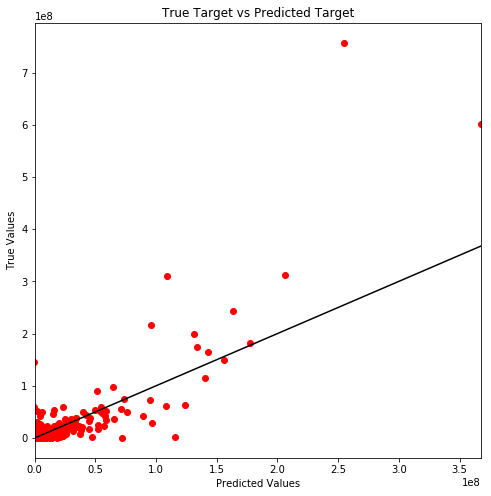

In [75]:
X_test.reset_index(drop = True, inplace = True)

def runGSAndGetRMSE(est, params):
    gs = GridSearchCV(est, param_grid = params, verbose=0, scoring='r2')
    gs.fit(X_train_ss, y_train)
    print("Your best R^2 score is:",np.sqrt(gs.best_score_))
    print("Your best alpha value is:",gs.best_params_)
    y_pred = gs.predict(X_test_ss)

    y_pred_df = pd.DataFrame(y_pred)

    for i in X_test.index:
        if X_test.LU_CM[i] == 1:
            y_pred_df.set_value(i, '0', 0)
#                y_pred[i] == 0
        elif X_test.LU_EA[i] == 1:
            y_pred_df.set_value(i, '0', 0)
#                y_pred[i] == 0

    x = np.linspace(0, max(y_pred), 1000)
    plt.figure(figsize=(8,8))
    plt.title('True Target vs Predicted Target')
    plt.scatter(y_pred_df[0],y_test, color = 'r')
    plt.plot(x,x, color = 'black')
    plt.xlabel('Predicted Values')
    plt.ylabel('True Values')
    plt.xlim(0,max(y_pred))

    return(gs.best_estimator_, gs.best_score_, y_pred_df)

#Ridge Regression
ridgeParams = {'alpha':np.linspace(1, 6000, num=2)}
bestRidgeEst = runGSAndGetRMSE(Ridge(), ridgeParams)

Your best R^2 score is: 0.5519605104802862
Your best alpha value is: {'alpha': 1.0}


/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


ValueError: x and y must be the same size

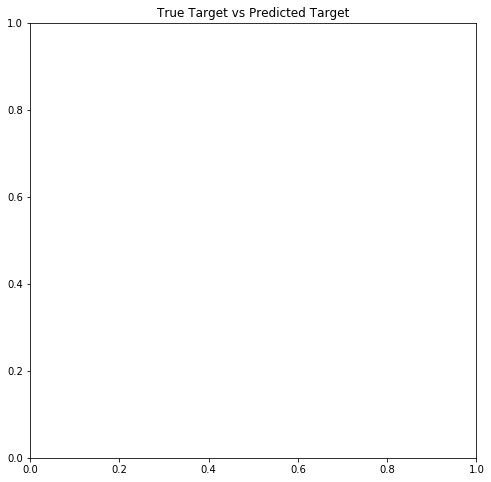

In [189]:
gs = GridSearchCV(Ridge(), param_grid = {'alpha':np.linspace(1, 6000, num=2)}, verbose=0, scoring='r2')
gs.fit(X_train_ss, y_train)
print("Your best R^2 score is:",np.sqrt(gs.best_score_))
print("Your best alpha value is:",gs.best_params_)
y_pred = gs.predict(X_test_ss)

y_pred_df = pd.DataFrame(y_pred)

for i in X_test.index:
    if X_test.LU_CM[i] == 1:
        y_pred_df.set_value(i, '0', 0)
#                y_pred[i] == 0
    elif X_test.LU_EA[i] == 1:
        y_pred_df.set_value(i, '0', 0)
#                y_pred[i] == 0

x = np.linspace(0, max(y_pred), 1000)
plt.figure(figsize=(8,8))
plt.title('True Target vs Predicted Target')
plt.scatter(y_pred_df[0],y_test, color = 'r')
plt.plot(x,x, color = 'black')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.xlim(0,max(y_pred))

In [308]:
#make the values of the properties with a value of 0 == 1. Then we can take the log transform of the price.
for i in range(len(train_2018)):
    if train_2018.AV_TOTAL[i] == 0:
        train_2018.set_value(i, 'AV_TOTAL', 1)
    else:
        continue
#            train_df_.set_value(i, 'AV_TOTAL', train_df_['AV_TOTAL'][i])

#Filter the DataFrame for the outliers        
train_df_ = train_2018[train_2018['AV_TOTAL']<np.percentile(train_2018['AV_TOTAL'], 95)]

#Make the target into a log transform
train_df_.AV_TOTAL = np.log(train_df_.AV_TOTAL)

df_train = train_df_
df_test = test_2018


#Feature Engineering on Training Set
categorical_features = df_train.select_dtypes(include = ['object']).columns
df_train_categorical = df_train[categorical_features]
df_train_categorical['PTYPE'] = df_train['PTYPE']
df_train_categorical['YR_BUILT'] = df_train['YR_BUILT']
df_train_categorical['YR_REMOD'] = df_train['YR_REMOD']
df_train_categorical['ZIPCODE'] = df_train['ZIPCODE']
categoricals_to_drop = ['PID','OWNER','ST_NUM','ST_NAME','ST_NAME_SUF','UNIT_NUM',
                        'MAIL_ADDRESS','MAIL CS','MAIL_ZIPCODE', 'LatLong', 'GIS_ID']
df_train_categorical.drop(categoricals_to_drop, axis = 1, inplace=True)
df_train_dummied = pd.get_dummies(df_train_categorical)

numeric_features = df_train.select_dtypes(include = ['float64', 'int64']).columns
df_train_numeric = df_train[numeric_features]
numeric_drop_list = ['ZIPCODE','GROSS_TAX','AV_TOTAL','AV_LAND', 'AV_BLDG','PTYPE','YR_REMOD','YR_BUILT']
df_train_numeric.drop(numeric_drop_list, axis = 1, inplace = True)


#Feature Engineering on Testing Set
df_test.drop('MAIL_ZIPCODE', axis = 1, inplace = True)
categorical_features = df_test.select_dtypes(include = ['object']).columns
df_test_categorical = df_test[categorical_features]
df_test_categorical['PTYPE'] = df_test['PTYPE']
df_test_categorical['YR_BUILT'] = df_test['YR_BUILT']
df_test_categorical['YR_REMOD'] = df_test['YR_REMOD']
df_test_categorical['ZIPCODE'] = df_test['ZIPCODE']
categoricals_to_drop = ['PID','OWNER','ST_NUM','ST_NAME','ST_NAME_SUF','UNIT_NUM',
                        'MAIL_ADDRESS','MAIL CS', 'LatLong', 'GIS_ID']
df_test_categorical.drop(categoricals_to_drop, axis = 1, inplace=True)
df_test_dummied = pd.get_dummies(df_test_categorical)

numeric_features = df_test.select_dtypes(include = ['float64', 'int64']).columns
df_test_numeric = df_test[numeric_features]
numeric_drop_list = ['ZIPCODE','PTYPE','YR_REMOD','YR_BUILT']
df_test_numeric.drop(numeric_drop_list, axis = 1, inplace = True)

#y_testing = df_test['AV_TOTAL']


X_testing_set = pd.concat([df_test_numeric, df_test_dummied], axis = 1)
X_training_set = pd.concat([df_train_numeric, df_train_dummied], axis = 1)
X = X_training_set
y_total = df_train['AV_TOTAL']
y_tax = df_train['GROSS_TAX']
y_land = df_train['AV_LAND']
y_bldg = df_train['AV_BLDG']

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

In [309]:
for i in X_testing_set.columns:
    if i not in X_training_set.columns:
        print(i)

STRUCTURE_CLASS_0
STRUCTURE_CLASS_1
STRUCTURE_CLASS_G


In [195]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y_total,
                                                    train_size = 0.85,
                                                    random_state = 42)

#Scale Data
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Your best R^2 score is: 0.9814476361741026
Your best alpha value is: {'alpha': 0.01}


/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


(0, 13.109497252444765)

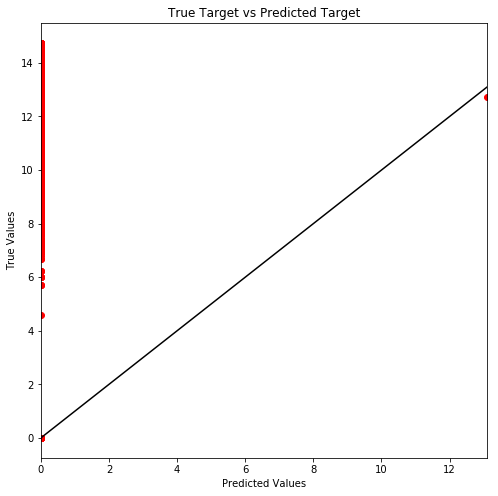

In [270]:
X_test.reset_index(drop = True, inplace = True)


gs = GridSearchCV(Ridge(), param_grid = {'alpha':np.linspace(0.01, 1, num=3)}, verbose=0, scoring='r2')
gs.fit(X_train_ss, y_train)
print("Your best R^2 score is:",np.sqrt(gs.best_score_))
print("Your best alpha value is:",gs.best_params_)
y_pred = gs.predict(X_test_ss)

y_pred_df = pd.DataFrame(y_pred)

for i in X_test.index:
    if X_test.LU_CM[i] == 1:
        y_pred_df.set_value(i, 0, 0)
#                y_pred[i] == 0
#    elif X_test.LU_E[i] == 1:
#        y_pred_df.set_value(i, 0, 0)
#                y_pred[i] == 0
#    elif X_test.S_NUM_BLDG[i] == 1:
#        y_pred_df.set_value(i, 0, 0)
#    elif X_test.PTYPE[i] == 995:
#        y_pred_df.set_value(i, 0, 0)

x = np.linspace(0, max(y_pred), 1000)
plt.figure(figsize=(8,8))
plt.title('True Target vs Predicted Target')
plt.scatter(y_pred_df[0],y_test, color = 'r')
plt.plot(x,x, color = 'black')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.xlim(0,max(y_pred))

#return gs.best_estimator_, gs.best_score_, y_pred

#    return(X_training_set)

#Ridge Regression
#ridgeParams = {'alpha':np.linspace(1, 10000, num=10)}
#bestRidgeEst = runGSAndGetRMSE(Ridge(), ridgeParams)

In [300]:
def convert_to_df_and_model(train_df, test_df, estimator):
    
    #make the values of the properties with a value of 0 == 1. Then we can take the log transform of the price.
    for i in range(len(train_df)):
        if train_df.AV_TOTAL[i] == 0:
            train_df.set_value(i, 'AV_TOTAL', 1)
        else:
            continue
    
    for i in range(len(train_df)):
        if train_df.GROSS_TAX[i] == 0:
            train_df.set_value(i, 'GROSS_TAX', 1)
        else:
            continue
            
    for i in range(len(train_df)):
        if train_df.AV_LAND[i] == 0:
            train_df.set_value(i, 'AV_LAND', 1)
        else:
            continue
    
    for i in range(len(train_df)):
        if train_df.AV_BLDG[i] == 0:
            train_df.set_value(i, 'AV_BLDG', 1)
        else:
            continue
    
    #Filter the DataFrame for the outliers, we'll take the 95% percentile to train our model on.        
    train_df_ = train_df[train_df['AV_TOTAL']<np.percentile(train_df['AV_TOTAL'], 95)]
    
    #depending on what you're trying to predict at you may want to use one of these instead!
    #train_df_ = train_df[train_df['GROSS_TAX']<np.percentile(train_df['GROSS_TAX'], 95)]
    #train_df_ = train_df[train_df['AV_LAND']<np.percentile(train_df['AV_LAND'], 95)]
    #train_df_ = train_df[train_df['AV_BLDG']<np.percentile(train_df['AV_BLDG'], 95)]
            
    #Make the target into a log transform
    train_df_.AV_TOTAL = np.log(train_df_.AV_TOTAL)
    
    #depending on what you're predicting you might want to add in the log transofrm of one of these too!
    #train_df_.GROSS_TAX = np.log(train_df_.GROSS_TAX)
    #train_df_.AV_LAND = np.log(train_df_.AV_LAND)
    #train_df_.AV_BLDG = np.log(train_df_.AV_BLDG)
    
    
    #Re-assinging the dataframe to another variable for naming purposes.
    df_train = train_df_
    df_test = test_df
    
    
    #Feature Engineering on Training Set
    #we'll take features that are either categorical and dummie them or numerical and eventually scale them.
    categorical_features = df_train.select_dtypes(include = ['object']).columns
    df_train_categorical = df_train[categorical_features]
    df_train_categorical['PTYPE'] = df_train['PTYPE']
    df_train_categorical['YR_BUILT'] = df_train['YR_BUILT']
    df_train_categorical['YR_REMOD'] = df_train['YR_REMOD']
    df_train_categorical['ZIPCODE'] = df_train['ZIPCODE']
    categoricals_to_drop = ['PID','OWNER','ST_NUM','ST_NAME','ST_NAME_SUF','UNIT_NUM',
                            'MAIL_ADDRESS','MAIL CS','MAIL_ZIPCODE', 'LatLong', 'GIS_ID']
    df_train_categorical.drop(categoricals_to_drop, axis = 1, inplace=True) #dropping the categorical variables that we don't need
    df_train_dummied = pd.get_dummies(df_train_categorical) #dummie-ing the categorical variables
    
    numeric_features = df_train.select_dtypes(include = ['float64', 'int64']).columns #selecting the 'numeric' features
    df_train_numeric = df_train[numeric_features]
    numeric_drop_list = ['ZIPCODE','GROSS_TAX','AV_TOTAL','AV_LAND', 'AV_BLDG','PTYPE','YR_REMOD','YR_BUILT'] #None of these are actually 'numerical' features
    df_train_numeric.drop(numeric_drop_list, axis = 1, inplace = True)
    
    
    #Feature Engineering on Testing Set
    # Here we'll take the exact same approach to the testing dataframe.
    categorical_features = df_test.select_dtypes(include = ['object']).columns
    df_test_categorical = df_test[categorical_features]
    df_test_categorical['PTYPE'] = df_test['PTYPE']
    df_test_categorical['YR_BUILT'] = df_test['YR_BUILT']
    df_test_categorical['YR_REMOD'] = df_test['YR_REMOD']
    df_test_categorical['ZIPCODE'] = df_test['ZIPCODE']
    categoricals_to_drop = ['PID','OWNER','ST_NUM','ST_NAME','ST_NAME_SUF','UNIT_NUM',
                            'MAIL_ADDRESS','MAIL CS', 'LatLong', 'GIS_ID']
    df_test_categorical.drop(categoricals_to_drop, axis = 1, inplace=True)
    df_test_dummied = pd.get_dummies(df_test_categorical)
    
    numeric_features = df_test.select_dtypes(include = ['float64', 'int64']).columns
    df_test_numeric = df_test[numeric_features]
    numeric_drop_list = ['ZIPCODE','PTYPE','YR_REMOD','YR_BUILT'] #None of these are actually 'numerical' features
    df_test_numeric.drop(numeric_drop_list, axis = 1, inplace = True)
    
    # Now, we concatenate the categorical and dummied variables back together for both training and testing dataframes
    X_testing_set = pd.concat([df_test_numeric, df_test_dummied], axis = 1)
    X_training_set = pd.concat([df_train_numeric, df_train_dummied], axis = 1)
    
    print('test shape', X_testing_set.shape)
    print('train shape', X_training_set.shape)
    
    # Here we assign our feature matrix and specified target variables.
    X = X_training_set
    y_total = df_train['AV_TOTAL']
    y_tax = df_train['GROSS_TAX']
    y_land = df_train['AV_LAND']
    y_bldg = df_train['AV_BLDG']
    
    #Train test split
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y_total,
                                                        train_size = 0.85,
                                                        random_state = 42)

    #Scale Data
    ss = StandardScaler()
    ss.fit(X_training_set)
    X_train_ss = ss.transform(X_train)
    X_test_ss = ss.transform(X_test)

    
#    print('First, let\'s look at the data')
#    plt.figure(figsize=(10,6))
#    sns.distplot(np.log(train_df[train_df['AV_TOTAL']>0]['AV_TOTAL']))
#    plt.title('Assessed Tax Value')
#    plt.xlabel('log(AV_TOTAL)');
    
#    plt.figure(figsize=(10,6))
#    sns.distplot(np.log(train_df[train_df['GROSS_TAX']>0]['GROSS_TAX']))
#    plt.title('GROSS_TAX')
#    plt.xlabel('log(GROSS_TAX)');
    
#    plt.figure(figsize=(10,6))
#    sns.distplot(np.log(i[i['AV_LAND']>0]['AV_LAND']))
#    plt.title('AV_LAND')
#    plt.xlabel('log(AV_LAND)');
    
#    plt.figure(figsize=(10,6))
#    sns.distplot(np.log(i[i['AV_BLDG']>0]['AV_BLDG']))
#    plt.title('AV_BLDG')
#    plt.xlabel('log(AV_BLDG)');

    X_test.reset_index(drop = True, inplace = True)

    def runGSAndGetRMSE(est, params):
        gs = GridSearchCV(est, param_grid = params, verbose=0, scoring='r2')
        gs.fit(X_train_ss, y_train)
        print("Your best R^2 score is:",np.sqrt(gs.best_score_))
        print("Your best alpha value is:",gs.best_params_)
        y_pred = gs.predict(X_test_ss)
        
        y_pred_df = pd.DataFrame(y_pred)

        for i in X_test.index:
            if X_test.LU_CM[i] == 1:
                y_pred_df.set_value(i, 0, 0)

        x = np.linspace(0, max(y_pred), 1000)
        plt.figure(figsize=(8,8))
        plt.title('True Target vs Predicted Target')
        plt.scatter(y_pred_df[0],y_test, color = 'r')
        plt.plot(x,x, color = 'black')
        plt.xlabel('Predicted Values')
        plt.ylabel('True Values')
        plt.xlim(0,max(y_pred))
        
        return(gs.best_estimator_, gs.best_score_, y_pred)
                 
    #Ridge Regression
    ridgeParams = {'alpha':[0.01]}
    bestRidgeEst = runGSAndGetRMSE(estimator(), ridgeParams)
    
    #Standard Scale the X_testing_set
    ss_ = StandardScaler()
    ss_.fit(X_training_set)
    X_testing_set_ss = ss_.transform(X_testing_set)
    test_df_predictions = gs.predict(X_testing_set_ss)

    solution = pd.DataFrame({"PID":test_df.PID, 
                             "AV_TOTAL_preds":test_df_predictions}, 
                            columns=['PID', 'AV_TOTAL_preds'])

    #convert out of log format
    solution.AV_TOTAL_preds = np.exp(solution.AV_TOTAL_preds)
    solution.to_csv("AV_TOTAL_test_predictions.csv", index = False)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

test shape (40000, 1902)
train shape (123627, 171)


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Your best R^2 score is: 0.9814476668387736
Your best alpha value is: {'alpha': 0.01}


/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:148: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


ValueError: operands could not be broadcast together with shapes (40000,1902) (171,) (40000,1902) 

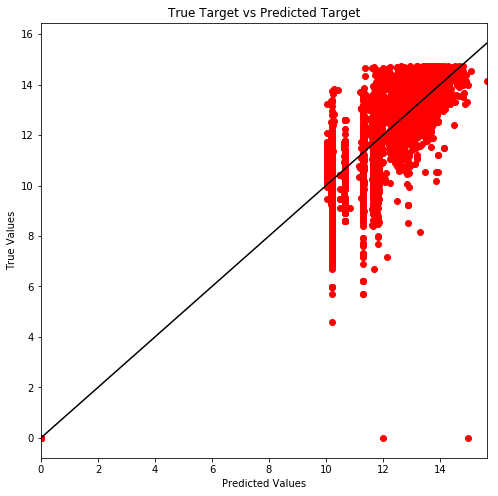

In [301]:
convert_to_df_and_model(train_2018, test_2018, Ridge)

In [202]:
y_df = pd.DataFrame(y_pred)

In [204]:
y_df.rename({0:'y_pred'}, axis = 1, inplace = True)

In [205]:
y_test_df = pd.DataFrame(y_test)

In [206]:
y_test_df.reset_index(drop=True, inplace=True)

In [207]:
y_test_df.rename({'AV_TOTAL':'y_true'}, inplace = True, axis =1 )

In [208]:
y_df['y_true'] = y_test_df['y_true']

In [221]:
zero_indexs = y_df[(y_df['y_true'] == 0) & (y_df['y_pred'] != 0)].index

In [222]:
zero_indexs_ = list(zero_indexs)

In [223]:
X_test.index

RangeIndex(start=0, stop=18545, step=1)

In [224]:
#some_df = X_train[X_train.S_NUM_BLDG == 1]
#some_df['AV_TOTAL'] = y_train
#some_df.AV_TOTAL.value_counts()

In [231]:
X_test_ = X_test
X_test_['y_pred'] = y_pred
X_test_['y_true'] = y_test.reset_index(drop=True)

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [239]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(X_test_[(X_test_['y_true'] == 0) & (X_test_['y_pred'] > 10)])

LAND_SF  GROSS_AREA  LIVING_AREA  NUM_FLOORS  R_TOTAL_RMS  R_BDRMS  \
5692   58329.0         1.0          1.0         1.0     10.08786      0.0   
16316  78218.0         1.0          1.0        13.0     10.08786      0.0   

       R_FULL_BTH  R_HALF_BTH   R_KITCH  R_FPLACE  S_NUM_BLDG  S_UNIT_RES  \
5692          0.0         0.0  1.765039       0.0         0.0         0.0   
16316         0.0         0.0  1.765039       0.0         0.0         0.0   

       S_UNIT_COM  S_UNIT_RC  U_BASE_FLOOR  U_NUM_PARK  U_TOT_RMS  U_BDRMS  \
5692          0.0        0.0           0.0         0.0        0.0      0.0   
16316         0.0        0.0           0.0         0.0        0.0      0.0   

       U_FULL_BTH  U_HALF_BTH  U_FPLACE  PTYPE  YR_BUILT  YR_REMOD  ZIPCODE  \
5692          0.0         0.0       0.0    907    2016.0    2006.0   2114.0   
16316         0.0         0.0       0.0     31    2013.0    2006.0   2215.0   

       LU_A  LU_AH  LU_C  LU_CC  LU_CD  LU_CL  LU_CM  LU_CP  LU_E  LU_EA  \
5692      0      0     0      0      0      0      0      0     0      1   
16316     0      0     0      0      0      0      0      0     0      0   

       LU_I  LU_R1  LU_R2  LU_R3  LU_R4  LU_RC  LU_RL  OWN_OCC_N  OWN_OCC_Y  \
5692      0      0      0      0      0      0      0          1          0   
16316     0      0      0      0      0      1      0          1          0   

       STRUCTURE_CLASS_A  STRUCTURE_CLASS_B  STRUCTURE_CLASS_C  \
5692                   1                  0                  0   
16316                  1                  0                  0   

       STRUCTURE_CLASS_D  STRUCTURE_CLASS_E  STRUCTURE_CLASS_Q  \
5692                   0                  0                  0   
16316                  0                  0                  0   

       STRUCTURE_CLASS_R  R_BLDG_STYL_0  R_BLDG_STYL_BL  R_BLDG_STYL_BW  \
5692                   0              0               0               0   
16316                  0              0               0               0   

       R_BLDG_STYL_CL  R_BLDG_STYL_CN  R_BLDG_STYL_CP  R_BLDG_STYL_CV  \
5692                0               0               0               0   
16316               0               0               0               0   

       R_BLDG_STYL_DK  R_BLDG_STYL_DX  R_BLDG_STYL_OT  R_BLDG_STYL_RE  \
5692                0               0               0               0   
16316               0               0               0               0   

       R_BLDG_STYL_RM  R_BLDG_STYL_RN  R_BLDG_STYL_RR  R_BLDG_STYL_SD  \
5692                0               0               0               1   
16316               1               0               0               0   

       R_BLDG_STYL_SL  R_BLDG_STYL_TD  R_BLDG_STYL_TF  R_BLDG_STYL_TL  \
5692                0               0               0               0   
16316               0               0               0               0   

       R_BLDG_STYL_VT  R_ROOF_TYP_0  R_ROOF_TYP_F  R_ROOF_TYP_G  R_ROOF_TYP_H  \
5692                0             0             0             1             0   
16316               0             0             1             0             0   

       R_ROOF_TYP_L  R_ROOF_TYP_M  R_ROOF_TYP_O  R_ROOF_TYP_S  R_EXT_FIN_0  \
5692              0             0             0             0            0   
16316             0             0             0             0            0   

       R_EXT_FIN_A  R_EXT_FIN_B  R_EXT_FIN_C  R_EXT_FIN_F  R_EXT_FIN_G  \
5692             0            0            0            0            0   
16316            0            1            0            0            0   

       R_EXT_FIN_K  R_EXT_FIN_M  R_EXT_FIN_O  R_EXT_FIN_P  R_EXT_FIN_S  \
5692             0            1            0            0            0   
16316            0            0            0            0            0   

       R_EXT_FIN_U  R_EXT_FIN_V  R_EXT_FIN_W  R_HEAT_TYP_0  R_HEAT_TYP_E  \
5692             0            0            0             0             0   
16316            0    

In [232]:
X_test.iloc[zero_indexs_]

LAND_SF  GROSS_AREA  LIVING_AREA  NUM_FLOORS  R_TOTAL_RMS  R_BDRMS  \
20       1400.0         0.0          0.0         3.0     10.08786      0.0   
21       1980.0         0.0          0.0         3.0     10.08786      0.0   
55      20200.0         0.0          0.0         2.0     10.08786      0.0   
91       4000.0         0.0          0.0         3.0     10.08786      0.0   
94       3302.0         0.0          0.0         4.0     10.08786      0.0   
99       6424.0         0.0          0.0         3.0     10.08786      0.0   
147      9168.0         0.0          0.0         4.0     10.08786      0.0   
188      1016.0         0.0          0.0         4.0     10.08786      0.0   
193      2835.0         0.0          0.0         4.0     10.08786      0.0   
201     11755.0         0.0          0.0         3.0     10.08786      0.0   
208      5268.0         0.0          0.0         2.0     10.08786      0.0   
224      2420.0         0.0          0.0         5.0     10.08786      0.0   
250      3361.0         0.0          0.0         6.0     10.08786      0.0   
261      1346.0         0.0          0.0         4.0     10.08786      0.0   
263      2262.0         0.0          0.0         3.0     10.08786      0.0   
295      2748.0         0.0          0.0         4.0     10.08786      0.0   
311      3069.0         0.0          0.0         3.0     10.08786      0.0   
318      1965.0         0.0          0.0         4.0     10.08786      0.0   
334      3860.0         0.0          0.0         3.0     10.08786      0.0   
346      1827.0         0.0          0.0         3.0     10.08786      0.0   
370      3309.0         0.0          0.0         5.0     10.08786      0.0   
391      7296.0         0.0          0.0         3.0     10.08786      0.0   
393      8662.0         0.0          0.0         3.0     10.08786      0.0   
403      2800.0         0.0          0.0         5.0     10.08786      0.0   
408      1016.0         0.0          0.0         3.5     10.08786      0.0   
410     10969.0         0.0          0.0         2.0     10.08786      0.0   
413     12948.0         0.0          0.0         4.0     10.08786      0.0   
433      2040.0         0.0          0.0         4.0     10.08786      0.0   
440      1542.0         0.0          0.0         3.0     10.08786      0.0   
455     29745.0         0.0          0.0         3.0     10.08786      0.0   
...         ...         ...          ...         ...          ...      ...   
17865    8782.0         0.0          0.0         4.0     10.08786      0.0   
17964    4283.0         0.0          0.0         3.0     10.08786      0.0   
17988    1858.0         0.0          0.0         2.0      9.00000      4.0   
18011    1474.0         0.0          0.0         3.0     10.08786      0.0   
18019   30780.0         0.0          0.0         3.0     10.08786      0.0   
18020     890.0         0.0          0.0         3.0     10.08786      0.0   
18024   48220.0         0.0          0.0        21.0     10.08786      0.0   
18032    2916.0         0.0          0.0         3.0     10.08786      0.0   
18051    4376.0         0.0          0.0         3.0     10.08786      0.0   
18075    2800.0         0.0          0.0         3.0     10.08786      0.0   
18084  108858.0         0.0          0.0        11.0     10.08786      0.0   
18114    6175.0         0.0          0.0         2.0     11.00000      5.0   
18121    4665.0         0.0          0.0         2.0     10.08786      0.0   
18231    2076.0         0.0          0.0         4.0     12.00000      5.0   
18232   22515.0         0.0          0.0         3.0     10.08786      0.0   
18242    1703.0         0.0          0.0         3.0     10.08786      0.0   
18257    7471.0         0.0          0.0         4.0     10.08786      0.0   
18271    1536.0         0.0          0.0         4.0     10.08786      0.0   
18318    3748.0         0.0          0.0         2.0     10.08786      0.0   
18359    3774.0         0.0   

In [141]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(X_test.iloc[zero_indexs_])

PTYPE     LAND_SF  YR_BUILT  YR_REMOD  GROSS_AREA  LIVING_AREA  \
7        995      4000.0    1999.0    1999.0         0.0          0.0   
23       995      4069.0    1999.0    1999.0         0.0          0.0   
99       995      1547.0    1999.0    1999.0         0.0          0.0   
107      995      1142.0    1999.0    1999.0         0.0          0.0   
121      995      8295.0    1920.0    2001.0         0.0          0.0   
123      995      3907.0    1910.0    2006.0         0.0          0.0   
130      995      2803.0    1905.0    2006.0         0.0          0.0   
142      995     88172.0    2006.0    2000.0         0.0          0.0   
183      995      3598.0    1905.0    2004.0         0.0          0.0   
198      995      1863.0    1905.0    1999.0         0.0          0.0   
229      995      1750.0    1999.0    1999.0         0.0          0.0   
256      995      2809.0    1999.0    1999.0         0.0          0.0   
290      995     19282.0    1999.0    1999.0         0.0          0.0   
325      995      6521.0    1920.0    2005.0         0.0          0.0   
364      995      1440.0    1999.0    1999.0         0.0          0.0   
403      995      2142.0    1875.0    2003.0         0.0          0.0   
435      995      6360.0    1999.0    1999.0         0.0          0.0   
491      995      2680.0    1999.0    1999.0         0.0          0.0   
535      995      9403.0    1999.0    1999.0         0.0          0.0   
540      995      3107.0    1918.0    2005.0         0.0          0.0   
548      995      4060.0    1999.0    1999.0         0.0          0.0   
551      995      5138.0    1999.0    1999.0         0.0          0.0   
552      995      3961.0    1999.0    1999.0         0.0          0.0   
561      995      3207.0    1915.0    2000.0         0.0          0.0   
574      995      3725.0    1999.0    1999.0         0.0          0.0   
615      995      1914.0    1999.0    1999.0         0.0          0.0   
624      995      2002.0    1890.0    2005.0         0.0          0.0   
629      995      1813.0    1999.0    1999.0         0.0          0.0   
684      995     16513.0    1999.0    1999.0         0.0          0.0   
699      995      1155.0    1885.0    2000.0         0.0          0.0   
704      995      1885.0    1905.0    1996.0         0.0          0.0   
713      995      3375.0    1905.0    2006.0         0.0          0.0   
760      995      1328.0    1999.0    1999.0         0.0          0.0   
761      995      1539.0    1999.0    1999.0         0.0          0.0   
812      995       787.0    1999.0    1999.0         0.0          0.0   
824      995      1961.0    1905.0    2005.0         0.0          0.0   
837      995      6310.0    1999.0    1999.0         0.0          0.0   
867      995      1160.0    1890.0    2003.0         0.0          0.0   
872      995     59583.0    1999.0    1999.0         0.0          0.0   
873      995      5445.0    1905.0    2001.0         0.0          0.0   
881      995      4969.0    1999.0    1999.0         0.0          0.0   
936      995      6120.0    1999.0    1999.0         0.0          0.0   
943      995      4194.0    1905.0    2000.0         0.0          0.0   
951      995      9100.0    1910.0    2001.0         0.0          0.0   
996      995       959.0    1890.0    1999.0         0.0          0.0   
1009     995      2071.0    1875.0    2006.0         0.0          0.0   
1028     995      1040.0    1900.0    2000.0         0.0          0.0   
1049     995      4230.0    1905.0    2002.0         0.0          0.0   
1052     995      1140.0    1999.0    1999.0         0.0          0.0   
1082     995      6514.0    1920.0    2000.0         0.0          0.0   
1111     995      5697.0    2006.0    2000.0         0.0          0.0   
1116     995      6017.0    1925.0    2001.0         0.0          0.0   
1124     995      1670.0    1999.0    1999.0         0.0          0.0   
1129     995     43579.0    2004.0    2000.0         0.0         

In [135]:
X_test.iloc[zero_indexs_].U_KITCH_TYPE_O.value_counts()

1    1080
Name: U_KITCH_TYPE_O, dtype: int64

In [53]:
X__Test = X_test
X__Test['AV_TOTAL'] = y_test

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [74]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(X__Test[X__Test['AV_TOTAL'] == 0].describe().T)

count         mean           std     min          25%  \
PTYPE              259.0   202.181467    268.544833    13.0   102.000000   
LAND_SF            259.0  7302.053638  43423.723632     0.0  1044.212711   
YR_BUILT           259.0  1925.158301     35.715853  1805.0  1900.000000   
YR_REMOD           259.0  1995.826255      9.473992  1950.0  1997.500000   
GROSS_AREA         259.0  4718.831561  22098.110002     0.0   657.500000   
LIVING_AREA        259.0  3873.963521  20301.737142     0.0   657.500000   
NUM_FLOORS         259.0     1.855212      1.693376     0.0     1.000000   
R_TOTAL_RMS        259.0    10.165510      2.292262     4.0    10.068780   
R_BDRMS            259.0     1.907336      2.712143     0.0     0.000000   
R_FULL_BTH         259.0     0.803089      1.136016     0.0     0.000000   
R_HALF_BTH         259.0     0.119691      0.336935     0.0     0.000000   
R_KITCH            259.0     1.801540      0.525273     1.0     1.769613   
R_FPLACE           259.0     0.127413      0.397645     0.0     0.000000   
S_NUM_BLDG         259.0     0.050193      0.235819     0.0     0.000000   
S_UNIT_RES         259.0     0.196911      1.061952     0.0     0.000000   
S_UNIT_COM         259.0     0.000000      0.000000     0.0     0.000000   
S_UNIT_RC          259.0     0.000000      0.000000     0.0     0.000000   
U_BASE_FLOOR       259.0     1.282481      2.269425     0.0     0.000000   
U_NUM_PARK         259.0     0.291506      0.834043     0.0     0.000000   
U_TOT_RMS          259.0     3.155212      7.909402     0.0     0.000000   
U_BDRMS            259.0     1.751400      6.128636     0.0     0.000000   
U_FULL_BTH         259.0     0.632529      0.722603     0.0     0.000000   
U_HALF_BTH         259.0     0.062983      0.233818     0.0     0.000000   
U_FPLACE           259.0     0.061776      0.256781     0.0     0.000000   
LU_A               259.0     0.015444      0.123549     0.0     0.000000   
LU_AH              259.0     0.000000      0.000000     0.0     0.000000   
LU_C               259.0     0.023166      0.150722     0.0     0.000000   
LU_CC              259.0     0.007722      0.087704     0.0     0.000000   
LU_CD              259.0     0.370656      0.483916     0.0     0.000000   
LU_CL              259.0     0.003861      0.062137     0.0     0.000000   
LU_CM              259.0     0.046332      0.210610     0.0     0.000000   
LU_CP              259.0     0.015444      0.123549     0.0     0.000000   
LU_E               259.0     0.050193      0.218766     0.0     0.000000   
LU_EA              259.0     0.007722      0.087704     0.0     0.000000   
LU_I               259.0     0.003861      0.062137     0.0     0.000000   
LU_R1              259.0     0.181467      0.386151     0.0     0.000000   
LU_R2              259.0     0.092664      0.290523     0.0     0.000000   
LU_R3              259.0     0.111969      0.315939     0.0     0.000000   
LU_R4              259.0     0.011583      0.107206     0.0     0.000000   
LU_RC              259.0     0.023166      0.150722     0.0     0.000000   
LU_RL              259.0     0.034749      0.183498     0.0     0.000000   
OWN_OCC_N          259.0     0.521236      0.500516     0.0     0.000000   
OWN_OCC_Y          259.0     0.478764      0.500516     0.0     0.000000   
R_BLDG_STYL_0      259.0     0.540541      0.499319     0.0     0.000000   
R_BLDG_STYL_BW     259.0     0.003861      0.062137     0.0     0.000000   
R_BLDG_STYL_CL     259.0     0.162162      0.369313     0.0     0.000000   
R_BLDG_STYL_CN     259.0     0.003861      0.062137     0.0     0.000000   
R_BLDG_STYL_CP     259.0     0.015444      0.123549     0.0     0.000000   
R_BLDG_STYL_CV     259.0     0.057915      0.234035     0.0     0.000000   
R_BLDG_STYL_DK     259.0     0.050193      0.218766     0.0     0.000000   
R_BLDG_STYL_DX     259.0     0.007722      0.087704     0.0     0.000000   
R_BLDG_STYL_OT     259.0     0.000000      0.000000     0.0     0.0

In [73]:
X__Test[X__Test['AV_TOTAL'] == 0].describe().T

count         mean           std     min          25%  \
PTYPE              259.0   202.181467    268.544833    13.0   102.000000   
LAND_SF            259.0  7302.053638  43423.723632     0.0  1044.212711   
YR_BUILT           259.0  1925.158301     35.715853  1805.0  1900.000000   
YR_REMOD           259.0  1995.826255      9.473992  1950.0  1997.500000   
GROSS_AREA         259.0  4718.831561  22098.110002     0.0   657.500000   
LIVING_AREA        259.0  3873.963521  20301.737142     0.0   657.500000   
NUM_FLOORS         259.0     1.855212      1.693376     0.0     1.000000   
R_TOTAL_RMS        259.0    10.165510      2.292262     4.0    10.068780   
R_BDRMS            259.0     1.907336      2.712143     0.0     0.000000   
R_FULL_BTH         259.0     0.803089      1.136016     0.0     0.000000   
R_HALF_BTH         259.0     0.119691      0.336935     0.0     0.000000   
R_KITCH            259.0     1.801540      0.525273     1.0     1.769613   
R_FPLACE           259.0     0.127413      0.397645     0.0     0.000000   
S_NUM_BLDG         259.0     0.050193      0.235819     0.0     0.000000   
S_UNIT_RES         259.0     0.196911      1.061952     0.0     0.000000   
S_UNIT_COM         259.0     0.000000      0.000000     0.0     0.000000   
S_UNIT_RC          259.0     0.000000      0.000000     0.0     0.000000   
U_BASE_FLOOR       259.0     1.282481      2.269425     0.0     0.000000   
U_NUM_PARK         259.0     0.291506      0.834043     0.0     0.000000   
U_TOT_RMS          259.0     3.155212      7.909402     0.0     0.000000   
U_BDRMS            259.0     1.751400      6.128636     0.0     0.000000   
U_FULL_BTH         259.0     0.632529      0.722603     0.0     0.000000   
U_HALF_BTH         259.0     0.062983      0.233818     0.0     0.000000   
U_FPLACE           259.0     0.061776      0.256781     0.0     0.000000   
LU_A               259.0     0.015444      0.123549     0.0     0.000000   
LU_AH              259.0     0.000000      0.000000     0.0     0.000000   
LU_C               259.0     0.023166      0.150722     0.0     0.000000   
LU_CC              259.0     0.007722      0.087704     0.0     0.000000   
LU_CD              259.0     0.370656      0.483916     0.0     0.000000   
LU_CL              259.0     0.003861      0.062137     0.0     0.000000   
...                  ...          ...           ...     ...          ...   
U_ORIENT_0         259.0     0.494208      0.500934     0.0     0.000000   
U_ORIENT_A         259.0     0.030888      0.173349     0.0     0.000000   
U_ORIENT_B         259.0     0.003861      0.062137     0.0     0.000000   
U_ORIENT_C         259.0     0.003861      0.062137     0.0     0.000000   
U_ORIENT_E         259.0     0.000000      0.000000     0.0     0.000000   
U_ORIENT_F         259.0     0.235521      0.425146     0.0     0.000000   
U_ORIENT_M         259.0     0.011583      0.107206     0.0     0.000000   
U_ORIENT_T         259.0     0.220077      0.415101     0.0     0.000000   
U_HEAT_TYP_0       259.0     0.494208      0.500934     0.0     0.000000   
U_HEAT_TYP_E       259.0     0.042471      0.202052     0.0     0.000000   
U_HEAT_TYP_F       259.0     0.193050      0.395456     0.0     0.000000   
U_HEAT_TYP_N       259.0     0.000000      0.000000     0.0     0.000000   
U_HEAT_TYP_O       259.0     0.000000      0.000000     0.0     0.000000   
U_HEAT_TYP_P       259.0     0.030888      0.173349     0.0     0.000000   
U_HEAT_TYP_S       259.0     0.000000      0.000000     0.0     0.000000   
U_HEAT_TYP_W       259.0     0.239382      0.427533     0.0     0.000000   
U_AC_N             259.0     0.814672      0.389316     0.0     1.000000   
U_AC_Y             259.0     0.185328      0.389316     0.0     0.000000   
U_KITCH_TYPE_0     259.0     0.494208      0.500934     0.0     0.000000   
U_KITCH_TYPE_F     259.0     0.177606      0.382921     0.0     0.000000   
U_KITCH_TYPE_N     259.0     0.000000      0.000000     0.0     0.0

Your best R^2 score is: 0.8149207283556403
Your best alpha value is: {'alpha': 6000.0}
                  0
0      2.133831e+05
1      3.010143e+05
2      3.202994e+05
3      3.217550e+05
4      3.653836e+05
5      2.661597e+05
6      3.431939e+05
7      5.939930e+04
8      7.172252e+05
9      3.736775e+05
10     2.674940e+05
11     3.162689e+05
12     4.410455e+04
13     3.320637e+05
14     7.649796e+05
15     4.073549e+04
16     5.916789e+05
17     1.964481e+06
18     3.322248e+04
19     2.413342e+05
20     2.210023e+05
21     3.323816e+05
22     4.158719e+05
23     5.821153e+04
24     1.832467e+05
25     3.361707e+05
26     5.132538e+05
27     3.577620e+05
28     3.431840e+05
29     3.875336e+04
...             ...
23916  3.324041e+07
23917  4.833284e+05
23918  1.786034e+05
23919  6.884925e+05
23920  1.104858e+05
23921  4.991768e+05
23922  2.518439e+05
23923  3.795997e+05
23924  6.888558e+05
23925  2.958930e+05
23926  2.296539e+05
23927  4.277226e+05
23928  8.092321e+04
23929  2.3698

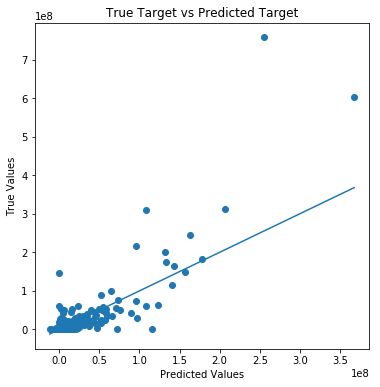

In [40]:
def runGSAndGetRMSE(est, params):
        gs = GridSearchCV(est, param_grid = params, verbose=0, scoring='r2')
        gs.fit(X_train_ss, y_train)
        print("Your best R^2 score is:",np.sqrt(gs.best_score_))
        print("Your best alpha value is:",gs.best_params_)
        y_pred = gs.predict(X_test_ss)
        
        x = np.linspace(min(y_pred), max(y_pred), 1000)
        plt.figure(figsize=(6,6))
        plt.title('True Target vs Predicted Target')
        plt.scatter(y_pred,y_test)
        plt.plot(x,x)
        plt.xlabel('Predicted Values')
        plt.ylabel('True Values')
        
        y_pred_df = pd.DataFrame(y_pred)
        
        print(y_pred_df)
        
        return gs.best_estimator_, gs.best_score_, y_pred
    
    #Ridge Regression
ridgeParams = {'alpha':np.linspace(1, 6000, num=2)}
bestRidgeEst = runGSAndGetRMSE(Ridge(), ridgeParams)

In [198]:
from sklearn.cluster import KMeans

In [199]:
X_.head()

PTYPE  LAND_SF  YR_BUILT  YR_REMOD  GROSS_AREA  LIVING_AREA  NUM_FLOORS  \
0    105   1150.0    1900.0    2000.0      3353.0       2202.0         3.0   
1    105   1150.0    1920.0    2000.0      3323.0       2307.0         3.0   
2    105   1150.0    1905.0    1985.0      3392.0       2268.0         3.0   
3    105   1150.0    1900.0    1991.0      3108.0       2028.0         3.0   
4    104   2010.0    1900.0    1978.0      3700.0       2546.0         3.0   

   R_TOTAL_RMS  R_BDRMS  R_FULL_BTH        ...          U_KITCH_TYPE_F  \
0         12.0      6.0         3.0        ...                       0   
1          9.0      3.0         3.0        ...                       0   
2         13.0      5.0         3.0        ...                       0   
3         11.0      5.0         3.0        ...                       0   
4         13.0      6.0         3.0        ...                       0   

   U_KITCH_TYPE_N  U_KITCH_TYPE_O  U_KITCH_TYPE_P  STRUCTURE_CLASS_A  \
0               0               0               0                  0   
1               0               0               0                  0   
2               0               0               0                  0   
3               0               0               0                  0   
4               0               0               0                  0   

   STRUCTURE_CLASS_B  STRUCTURE_CLASS_C  STRUCTURE_CLASS_D  STRUCTURE_CLASS_E  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   STRUCTURE_CLASS_R  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  

[5 rows x 148 columns]

In [202]:
numeric_features

Index(['ZIPCODE', 'PTYPE', 'LAND_SF', 'YR_BUILT', 'YR_REMOD', 'GROSS_AREA',
       'LIVING_AREA', 'NUM_FLOORS', 'R_TOTAL_RMS', 'R_BDRMS', 'R_FULL_BTH',
       'R_HALF_BTH', 'R_KITCH', 'R_FPLACE', 'S_NUM_BLDG', 'S_UNIT_RES',
       'S_UNIT_COM', 'S_UNIT_RC', 'U_BASE_FLOOR', 'U_NUM_PARK', 'U_TOT_RMS',
       'U_BDRMS', 'U_FULL_BTH', 'U_HALF_BTH', 'U_FPLACE', 'AV_BLDG',
       'GROSS_TAX', 'AV_LAND', 'AV_TOTAL'],
      dtype='object')

In [206]:
train_2008.ZIPCODE.unique()

array([ 2128.,     0.,  2122.,  2127.,  2129.,  2125.,  2130.,  2135.,
        2108.,  2114.,  2116.,  2115.,  2113.,  2109.,  2110.,  2119.,
        2210.,   214.,  1226.,  2118.,  2111.,  2112.,  2199.,  2215.,
       98221.,  1473.,  2158.,  2401.,  2120.,  2181.,  1116.,   211.,
        3070.,  2121.,  2137.,  2124.,  2107.,  2170.,  2201.,  2146.,
        2173.,  2219.,  2101.,  2126.,  2131.,  2123.,  2102.,  2134.,
        2304.,  2104.,  1224.,  2136.,  2132.,  8091.,  2103.,  2155.,
        2167.,  2467.,  2072.,  2446.,  2315.,  2139.,  1749.,  1803.,
        1720.,  2211.,  2162.,  2026.,  2165.,  2458.])